<a href="https://colab.research.google.com/github/AMAN-GITHUB11/Human-Resource-Analytics/blob/main/Statistics_M3_Capstone_Human_Resource_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re

def convert_google_sheet_url(url):
    # Regular expression to match and capture the necessary part of the URL
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'

    # Replace function to construct the new URL for CSV export
    # If gid is present in the URL, it includes it in the export URL, otherwise, it's omitted
    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'

    # Replace using regex
    new_url = re.sub(pattern, replacement, url)

    return new_url

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1iHgCD4CMSXMC-gLF47mM_xD-aSSsEN1oRIJRC5SFA_Q/edit#gid=219341941'

new_url = convert_google_sheet_url(url)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv(new_url)

In [ ]:
df

,EmployeeId,Hrs,Rating,EmployeeSatisfaction
0,E01,12.118051,Excellent,6
1,E02,13.298281,Excellent,8
2,E03,13.276334,Excellent,7
3,E04,10.798173,Excellent,9
4,E05,11.579172,Excellent,8
...,...,...,...,...
495,E496,13.807837,Outstanding,6
496,E497,9.237401,Excellent,8
497,E498,10.444520,Excellent,7
498,E499,12.143046,Excellent,8


In [ ]:
#observations are there in the dataset
df.shape

(500, 4)

In [ ]:
#variables have missing values
df.isna().sum()

EmployeeId              0
Hrs                     8
Rating                  0
EmployeeSatisfaction    0
dtype: int64

In [ ]:
#average value for the Hrs variable
df['Hrs'].mean()

11.309992252833334

In [ ]:
#Checking the outliers in the hrs variable.
df.describe(include='all')

,EmployeeId,Hrs,Rating,EmployeeSatisfaction
count,500,492.000000,500,500.000000
unique,500,NaN,6,NaN
top,E01,NaN,Excellent,NaN
freq,1,NaN,371,NaN
mean,NaN,11.309992,NaN,7.240000
std,NaN,5.266512,NaN,1.006193
min,NaN,0.091720,NaN,6.000000
25%,NaN,9.711867,NaN,6.000000
50%,NaN,11.204755,NaN,7.000000
75%,NaN,12.617792,NaN,8.000000


In [ ]:
#cardinality of the Rating variable in the dataset
df['Rating'].unique()

array(['Excellent', 'Outstanding', 'Unsatisfactory', 'satisfactory',
       'Satisfactory', 'Un satisfactory'], dtype=object)

In [ ]:
df.nunique()

EmployeeId              500
Hrs                     492
Rating                    6
EmployeeSatisfaction      4
dtype: int64

**Data cleaning:**

In [ ]:
#1.Standardise the Rating column: Make the column consistent so that it has cardinality of 4.
#[Hint: Use Unsatisfactory in place of Un satisfactory and Satisfactory in place of satisfactory]
df['Rating'].replace(['Un satisfactory','satisfactory'],['Unsatisfactory','Satisfactory'],inplace = True)

In [ ]:
#Remove any empty or incomplete rows: Check if there are any rows with missing data.
df.isna().sum()

EmployeeId              0
Hrs                     8
Rating                  0
EmployeeSatisfaction    0
dtype: int64

In [ ]:
##Substitute these values with the mean of numerical or mode for non-numerical data.
#[Challenge yourself: Try to fill mean/mode value corresponding to individual individual ratings]
df['Hrs'].fillna(df['Hrs'].mean(),inplace=True)

**Data Analysis**

**Part 1) Understanding the distributions and patterns within the HR data.**

In [ ]:
#mode of the employee performance in the rating column.
df['Rating'].mode()

0    Excellent
Name: Rating, dtype: object

In [ ]:
#range of hours the employee is working for in case of unsatisfactory rating
df_Unsatisfactory = df[df['Rating'] == 'Unsatisfactory']
print('Minimum of Working Hours when the rating is Unsatisfactory',df_Unsatisfactory['Hrs'].min())
print('Maximum of Working Hours when the rating is Unsatisfactory',df_Unsatisfactory['Hrs'].max())

Minimum of Working Hours when the rating is Unsatisfactory 0.091720323
Maximum of Working Hours when the rating is Unsatisfactory 8.489765491


Text(0, 0.5, 'Frequency')

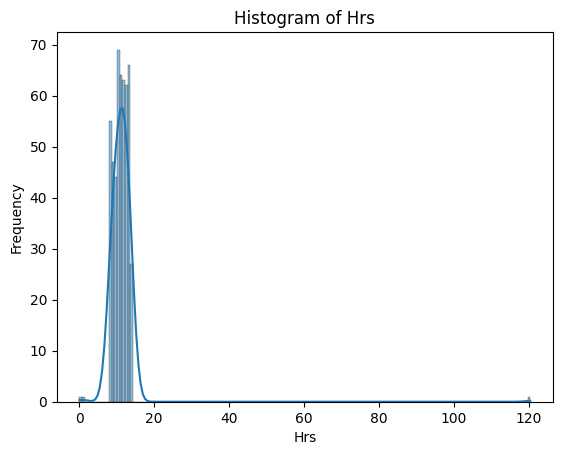

In [ ]:
#plot the visualisation
sns.histplot(df['Hrs'],kde=True)
plt.title('Histogram of Hrs')
plt.xlabel('Hrs')
plt.ylabel('Frequency')

Text(0.5, 0, 'Hrs')

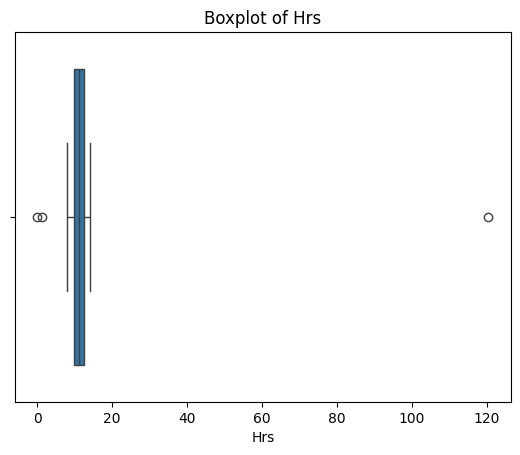

In [ ]:
#plot the visualisation
sns.boxplot(x=df['Hrs'])
plt.title('Boxplot of Hrs')
plt.xlabel('Hrs')

<Axes: xlabel='Rating', ylabel='Count'>

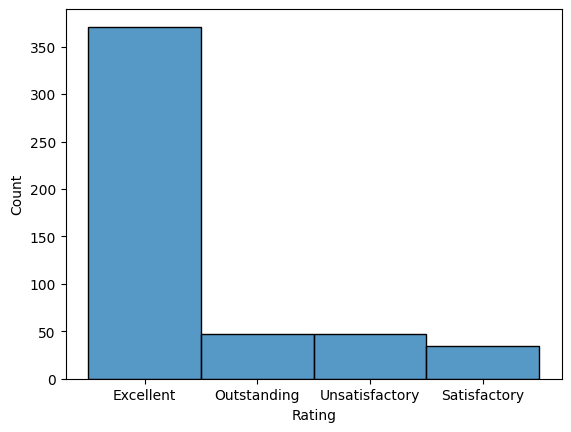

In [ ]:
#frequency plot for Rating
sns.histplot(df['Rating'])

<Axes: xlabel='EmployeeSatisfaction', ylabel='Count'>

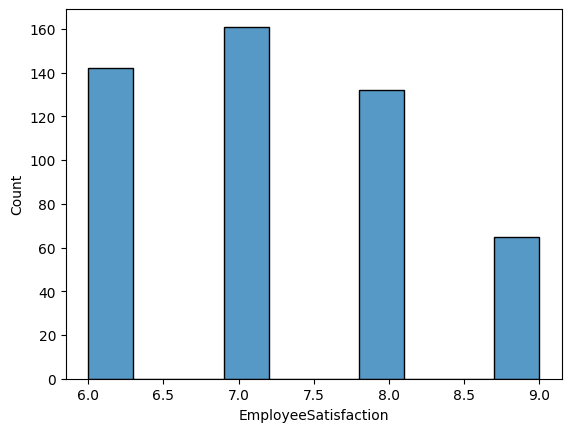

In [ ]:
#frequencies plot for Employee Satisfaction Score
sns.histplot(df['EmployeeSatisfaction'])

<Axes: xlabel='Rating', ylabel='Hrs'>

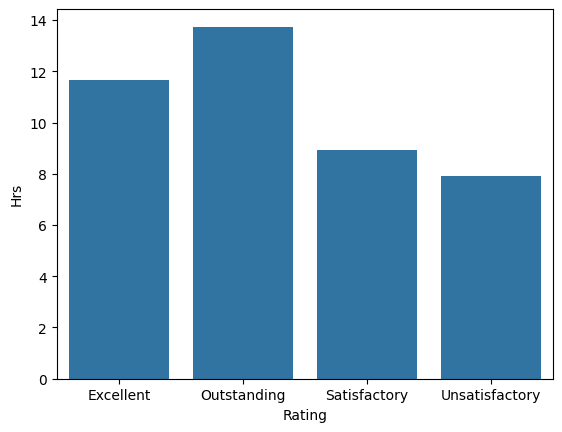

In [ ]:
#Which rating has the highest number of average working hours?

rating_highest_mean_of_hrs = df.groupby('Rating')['Hrs'].mean()
sns.barplot(rating_highest_mean_of_hrs)

**Part 2) Identifying and excluding the outliers!**

In [ ]:
#percentile of the Hrs Variable
twentyfive_percentile = np.percentile(df['Hrs'], 25)
seventyfive_percentile = np.percentile(df['Hrs'], 75)
print("25th percentile of df['Hrs'] : ",twentyfive_percentile)
print("75th percentile of df['Hrs'] : ",seventyfive_percentile)

25th percentile of df['Hrs'] :  9.75653112325
75th percentile of df['Hrs'] :  12.609561435


In [ ]:
#Lower cutoff and Upper cutoff of Hrs Variable
IQR = seventyfive_percentile - twentyfive_percentile
Lower_cutoff = round(twentyfive_percentile - 1.5*IQR,2)
Upper_cutoff = round(seventyfive_percentile + 1.5*IQR,2)
print("Lower cutoff of df['Hrs'] : ",Lower_cutoff)
print("Upper cutoff of df['Hrs'] : ",Upper_cutoff)

Lower cutoff of df['Hrs'] :  5.48
Upper cutoff of df['Hrs'] :  16.89


In [ ]:
#After treatment with the outliers, what’s the mean value for Hrs variable?
df_Hrs_temp = df[(df['Hrs']>=Lower_cutoff) & (df['Hrs']<=Upper_cutoff)]
round(df_Hrs_temp['Hrs'].mean(),2)

11.13

<Axes: xlabel='Rating', ylabel='Hrs'>

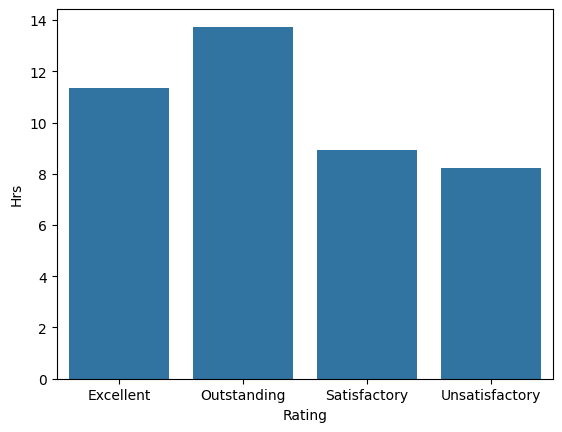

In [ ]:
#After treatment of outliers, which rating isn’t witnessing changes with respect to Hrs variable?
sns.barplot(df_Hrs_temp.groupby('Rating')['Hrs'].mean())

**Part 3) Understanding probability distributions and Confidence interval**

In [ ]:
#identify the probabilities for each rating within the dataset
df['Rating'].value_counts(normalize=True)

Excellent         0.742
Outstanding       0.094
Unsatisfactory    0.094
Satisfactory      0.070
Name: Rating, dtype: float64

In [ ]:
# calculate the probability that 2 out of a sample of 10 employees are rated as outstanding. Round it off to 2 decimal places.
n = 10
k = 2
p = 0.094
round(stats.binom.pmf(k,n,p),2)


0.18

In [ ]:
#calculate the probability that at least 3 out of a sample of 10 employees are rated as outstanding. Round it off to 2 decimal places.
n = 10
p = 0.094
round(1-stats.binom.cdf(2,n,p),2)

0.06

In [ ]:
#calculate the probability that at exactly 7 out of a sample of 10 employees are rated as outstanding or Excellent. Round it off to 2 decimal places.
p = 0.094+0.742 #Adding up the rating of Outstanding or Excellent
round(stats.binom.pmf(7,10,p),2)

0.15

In [ ]:
#calculate the probability that None of the trainees are rated as Unsatisfactory. Round it off to 2 decimal places.
round(stats.binom.pmf(0,10,0.094),2)

0.37

In [ ]:
#mean and SD for Hrs variable after outlier removal
Mean_after_outlier_removal = df_Hrs_temp['Hrs'].mean()
StandardDev_after_Outlier_removal = df_Hrs_temp['Hrs'].std()

In [ ]:
#what’s the probability that an employee will provide less than 9 hrs of service? Round it off to 2 decimal places.
Zscore = (9 - Mean_after_outlier_removal)/StandardDev_after_Outlier_removal
round(stats.norm.cdf(Zscore),2)

0.11

In [ ]:
#What’s the probability that an employee will provide hours of service between 11 to 14? Round it off to 2 decimal places.
p_till_fourteen = round(stats.norm.cdf((14 - Mean_after_outlier_removal)/StandardDev_after_Outlier_removal),2) #probability till 14 Hrs
p_till_eleveen = round(stats.norm.cdf((11 - Mean_after_outlier_removal)/StandardDev_after_Outlier_removal),2) #probability till 11 Hrs
p_till_fourteen - p_till_eleveen

0.48

In [ ]:
#Calculate the 95% Confidence interval for the average of Hrs variable.
z = 1.960
CI1 = round(df_Hrs_temp['Hrs'].mean() - (z*df_Hrs_temp['Hrs'].std()/np.sqrt(df_Hrs_temp.shape[0])),2)
CI2 = round(df_Hrs_temp['Hrs'].mean() + (z*df_Hrs_temp['Hrs'].std()/np.sqrt(df_Hrs_temp.shape[0])),2)

print('Confidence Interval is',CI1,CI2)

Confidence Interval is 10.98 11.28
